## CASE STUDY – CREDIT CARD SEGMENTATION
###### Definition of Target and Outcome Window
       The sample dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months.
       Identify cluster characterisitics of the cluster using detailed profiling.
       Provide the strategic insights and implementation of strategies for given set of cluster characteristics.
###### Data Pre-Processing - 
    - Missing Values Treatment (Mean imputation)
    - Univariate Analysis - Outlier analysis
###### Data Exploratory Analysis
    -Deriving new variables
    -Monthly average purhcase, Monthly average cash advance, limit_usage, payment_minpay, purchase_type_none, purchase_type_One_Of, purchase_type_Installment_Purchases, purchase_type_Both
    -Scaling dataframe(Standard Scalar)
###### K-Means
    -Finalizing cluster count
    -Classifying clusters and setting marketing strategy

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import statistics as st
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics

### Reading the dataset 

In [2]:
df = pd.read_csv('CC_GENERAL.csv')

In [3]:
df.sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
7615,C17821,2646.022772,1.000000,1541.13,487.00,1054.13,1234.504809,0.916667,0.250000,0.833333,0.333333,6,17,4000.0,600.203047,575.913224,0.000000,12
5049,C15191,122.113869,1.000000,1105.92,0.00,1105.92,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2500.0,1105.854643,173.332353,0.666667,12
360,C10372,601.920370,1.000000,983.77,603.77,380.00,0.000000,0.666667,0.416667,0.250000,0.000000,0,15,2400.0,389.411161,219.465695,0.000000,12
2233,C12303,33.319380,0.818182,279.56,0.00,279.56,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,3000.0,347.911693,146.317275,0.285714,12
7112,C17305,918.227230,1.000000,0.00,0.00,0.00,869.988157,0.000000,0.000000,0.000000,0.083333,6,0,1200.0,881.165040,1938.465006,0.000000,12


In [4]:
#Analyzing attributes and their datatypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [5]:
#Checking if any attribute has missing values
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

    CREDIT_LIMIT and MINIMUM_PAYMENTS have missing values.

### Missing Value Treatment

In [7]:
#Filling missing values for attribute CREDIT_LIMIT
df.CREDIT_LIMIT.fillna(df.CREDIT_LIMIT.mean(),inplace=True)

#Filling missing values for attribute MINIMUM_PAYMENTS
df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.mean(),inplace=True)

#Checking if any attribute has missing values 
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Deriving New Variables 

In [9]:
# Attribute monthly average for purchase 
df['Monthly_avg_purchase'] = df['PURCHASES'] / df['TENURE']

# Attribute monthly average for cash
df['Monthly_cash_advance'] = df['CASH_ADVANCE'] / df['TENURE']

# Attribute credit limit usage
df['limit_usage'] = df['BALANCE'] / df['CREDIT_LIMIT']

# Attribute payment to minimum payment ratio
df['payment_minpay']=df['PAYMENTS']/df['MINIMUM_PAYMENTS']

In [10]:
df.Monthly_avg_purchase.sample(5)

559      11.115833
2445    116.517500
5829    215.084167
6486      8.590000
7639      0.822500
Name: Monthly_avg_purchase, dtype: float64

In [11]:
df.Monthly_cash_advance.sample(5)

6629    27.391523
3630     0.000000
3873     0.000000
7362     0.000000
1396     0.000000
Name: Monthly_cash_advance, dtype: float64

In [12]:
df.limit_usage.sample(5)

6511    1.181740
3962    0.000571
1649    0.041144
4351    0.595245
4109    0.033468
Name: limit_usage, dtype: float64

In [13]:
df.payment_minpay.sample(5)

6285    1.629077
3899    2.489058
6587    4.129161
26      0.916592
4720    8.542200
Name: payment_minpay, dtype: float64

    From the list of attributes There are 3 attributes related to purchase. 
    Further analysing above mentioned attributes.

In [18]:
df.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','PURCHASES']]

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES
0,0.00,95.40,95.40
1,0.00,0.00,0.00
2,773.17,0.00,773.17
3,1499.00,0.00,1499.00
4,16.00,0.00,16.00
...,...,...,...
8945,0.00,291.12,291.12
8946,0.00,300.00,300.00
8947,0.00,144.40,144.40
8948,0.00,0.00,0.00


    PURCHASES attribute is total of ONEOFF_PURCHASES AND INSTALLMENTS_PURCHASES.
    From sample of observations displayed above it is clear that customer either does any one of the two or both or none.
    
    Below we will derive new variables as per the condition defined in above statement.

In [19]:
# Attribute if purchase type is none
df['purchase_type_none'] = np.where((df.ONEOFF_PURCHASES == 0) & (df.INSTALLMENTS_PURCHASES == 0),1,0)

# Attribute if purhcase type is one off purchase only
df['purchase_type_One_Of'] = np.where((df.ONEOFF_PURCHASES > 0) & (df.INSTALLMENTS_PURCHASES == 0),1,0)

# Attribute if purhcase type is installment purchase only
df['purchase_type_Installment_Purchases'] = np.where((df.ONEOFF_PURCHASES == 0) & (df.INSTALLMENTS_PURCHASES > 0),1,0)

# Attribute if purhcase type is both one off purchase and installment purchase
df['purchase_type_Both'] = np.where((df.ONEOFF_PURCHASES > 0) & (df.INSTALLMENTS_PURCHASES > 0),1,0)

In [20]:
df.purchase_type_none.value_counts() , df.purchase_type_One_Of.value_counts() , df.purchase_type_Installment_Purchases.value_counts() , df.purchase_type_Both.value_counts()

(0    6908
 1    2042
 Name: purchase_type_none, dtype: int64, 0    7076
 1    1874
 Name: purchase_type_One_Of, dtype: int64, 0    6690
 1    2260
 Name: purchase_type_Installment_Purchases, dtype: int64, 0    6176
 1    2774
 Name: purchase_type_Both, dtype: int64)

In [21]:
#Checking if any variable has a missing value.
df.isna().sum()

CUST_ID                                0
BALANCE                                0
BALANCE_FREQUENCY                      0
PURCHASES                              0
ONEOFF_PURCHASES                       0
INSTALLMENTS_PURCHASES                 0
CASH_ADVANCE                           0
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY             0
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY                 0
CASH_ADVANCE_TRX                       0
PURCHASES_TRX                          0
CREDIT_LIMIT                           0
PAYMENTS                               0
MINIMUM_PAYMENTS                       0
PRC_FULL_PAYMENT                       0
TENURE                                 0
Monthly_avg_purchase                   0
Monthly_cash_advance                   0
limit_usage                            0
payment_minpay                         0
purchase_type_none                     0
purchase_type_One_Of                   0
purchase_type_In

### Outlier Visualization

In [24]:
#Data Audit Report for numerical variables
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [28]:
df[df.columns.difference(['CUST_ID'])].apply(lambda x:var_summary(x)).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,1.400205e+07,1564.474828,873.385231,2081.531879,4.332775e+06,0.000000,0.065101,8.814518,23.575529,128.281915,873.385231,2054.140036,4338.563657,5909.111808,9338.804814,19043.138560
BALANCE_FREQUENCY,8950.0,0.0,7.851573e+03,0.877271,1.000000,0.236904,5.612351e-02,0.000000,0.090909,0.272727,0.454545,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
CASH_ADVANCE,8950.0,0.0,8.760896e+06,978.871112,0.000000,2097.163877,4.398096e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1113.821139,3065.534560,4647.169122,9588.163357,47137.211760
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1.209541e+03,0.135144,0.000000,0.200121,4.004857e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.833333,1.500000
CASH_ADVANCE_TRX,8950.0,0.0,2.907700e+04,3.248827,0.000000,6.824647,4.657580e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,10.000000,15.000000,29.000000,123.000000
CREDIT_LIMIT,8950.0,0.0,4.022532e+07,4494.449450,3000.000000,3638.612411,1.323950e+07,50.000000,500.000000,1000.000000,1200.000000,1600.000000,3000.000000,6500.000000,9500.000000,12000.000000,17000.000000,30000.000000
INSTALLMENTS_PURCHASES,8950.0,0.0,3.679055e+06,411.067645,89.000000,904.338115,8.178274e+05,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,468.637500,1140.070000,1750.087500,3886.240500,22500.000000
MINIMUM_PAYMENTS,8950.0,0.0,7.734649e+06,864.206542,335.628312,2330.588021,5.431641e+06,0.019163,20.040613,74.644117,109.131328,170.857654,335.628312,864.206542,1731.689977,2719.566935,8626.691541,76406.207520
Monthly_avg_purchase,8950.0,0.0,7.712678e+05,86.175173,31.936667,180.508787,3.258342e+04,0.000000,0.000000,0.000000,0.000000,3.399375,31.936667,97.228333,217.353917,339.250042,758.652750,4086.630833
Monthly_cash_advance,8950.0,0.0,7.963530e+05,88.977984,0.000000,193.136115,3.730156e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.085196,278.058470,425.548562,896.232349,3928.100980


C:\Users\chord\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\chord\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\chord\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot inte

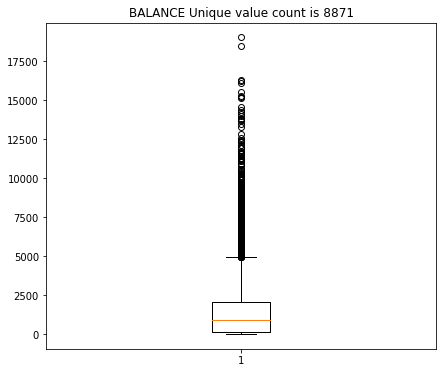

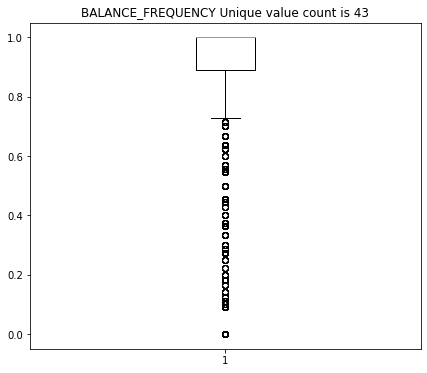

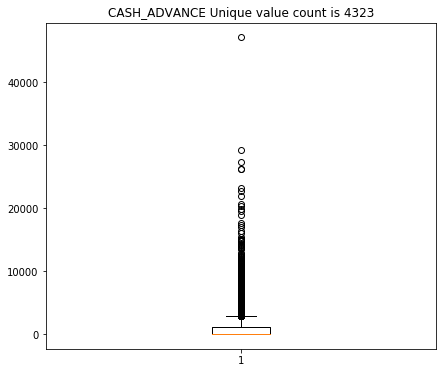

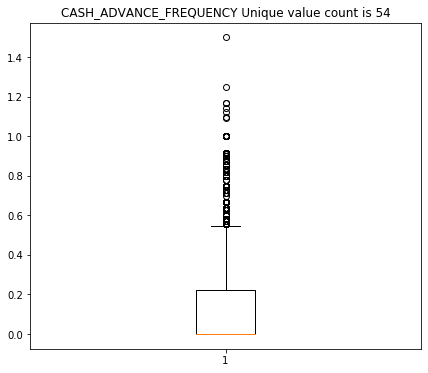

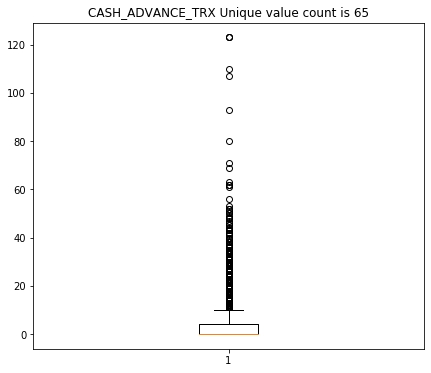

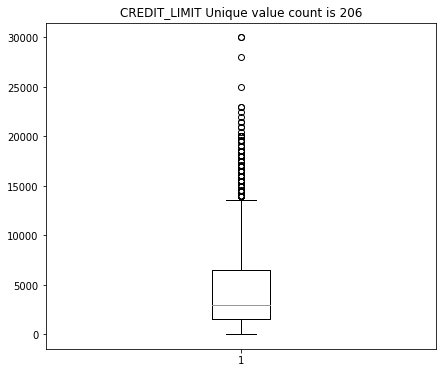

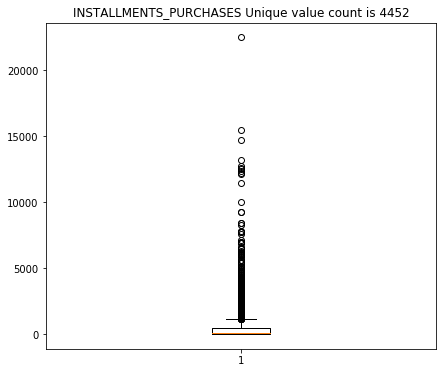

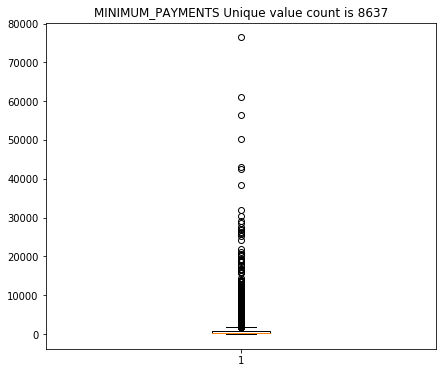

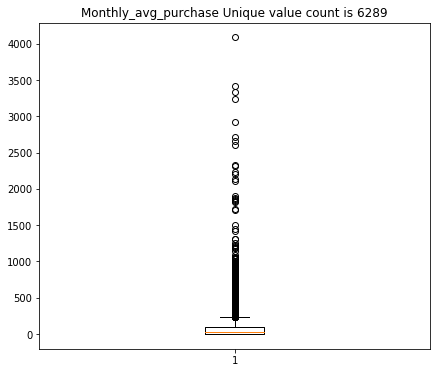

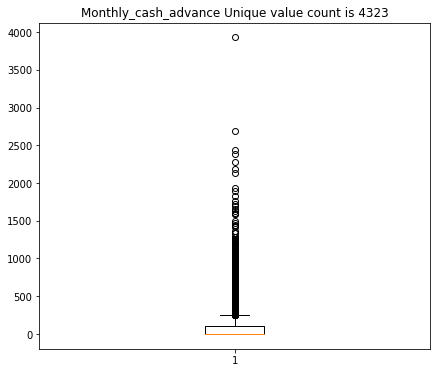

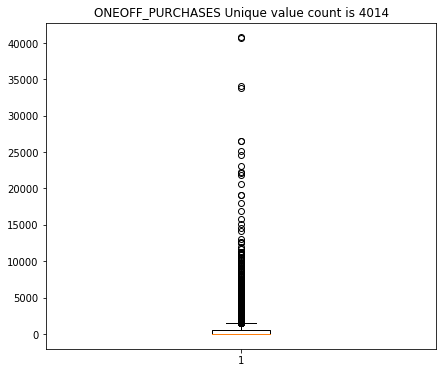

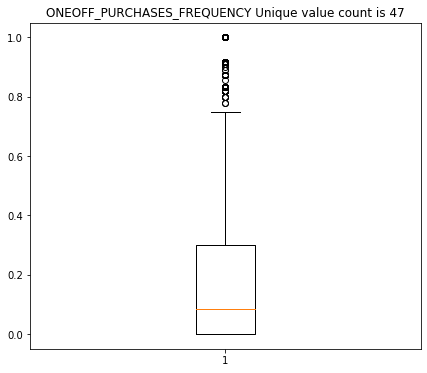

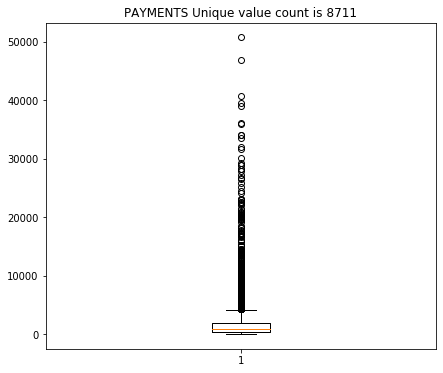

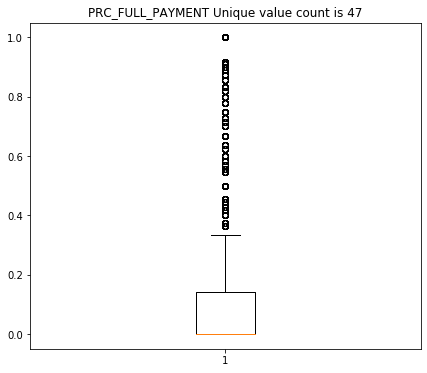

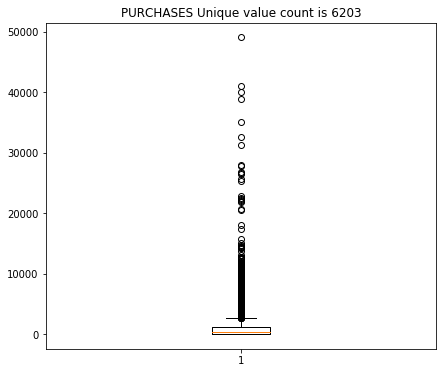

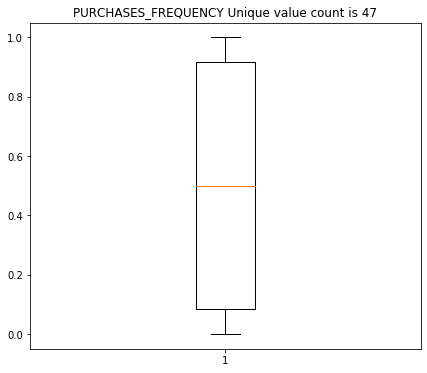

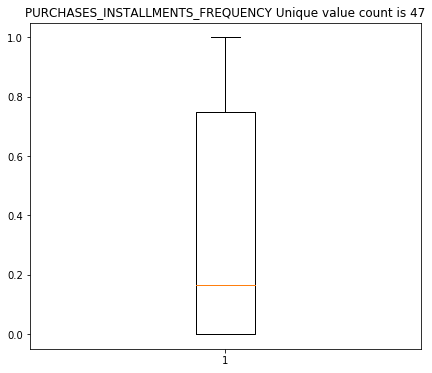

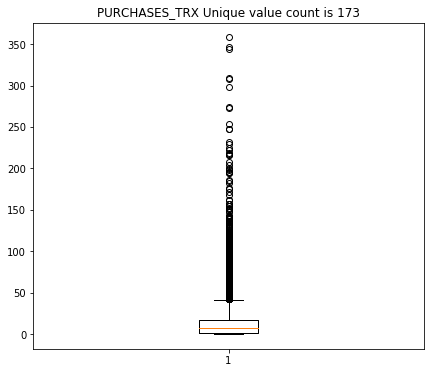

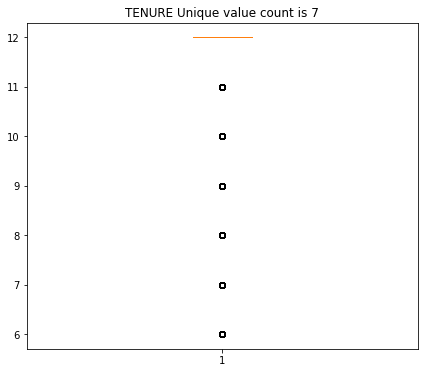

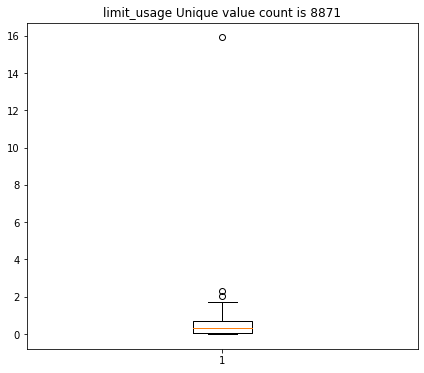

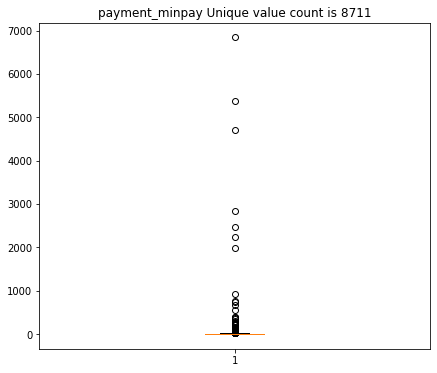

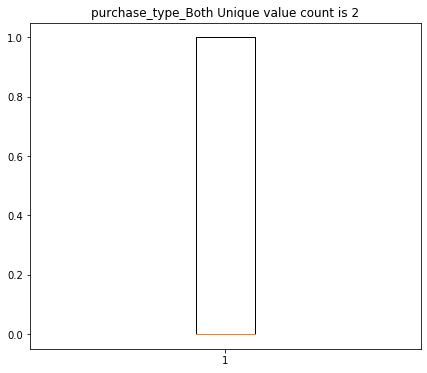

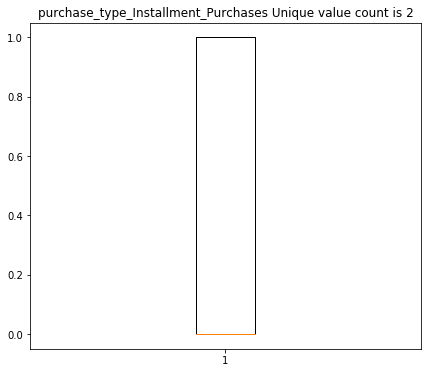

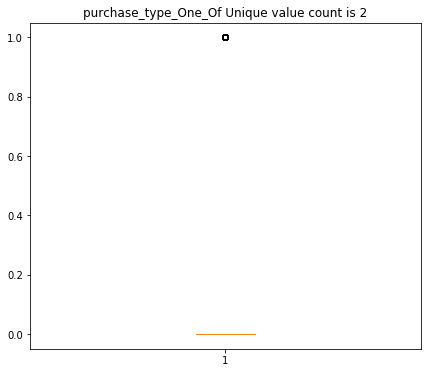

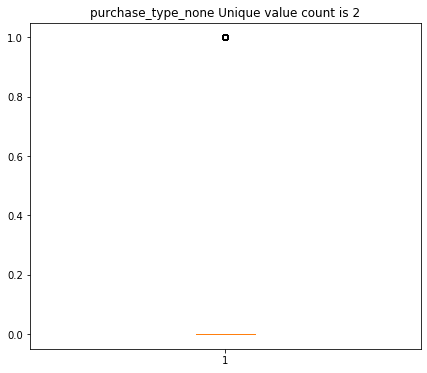

In [29]:
# Visualizing outliers
for i in df.columns.difference(['CUST_ID']):
    plt.figure(figsize=(7,6))
    count = df[i].nunique()
    plt.boxplot(df[i])
    plt.title(str(i)+str(" ")+str('Unique value count is ')+str(count))

In [30]:
#Function for outliers
def outlier(x):
    x = x.clip_upper(x.quantile(0.95))
    x = x.clip_lower(x.quantile(0.05))
    return x

df_clip = df[df.columns.difference(['CUST_ID'])].apply(lambda x: outlier(x))

C:\Users\chord\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\chord\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  after removing the cwd from sys.path.


In [31]:
# Log transformation of variabels
df_log = df[df.columns.difference(['CUST_ID'])].applymap(lambda x: np.log(x+1))

C:\Users\chord\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\chord\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\chord\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max

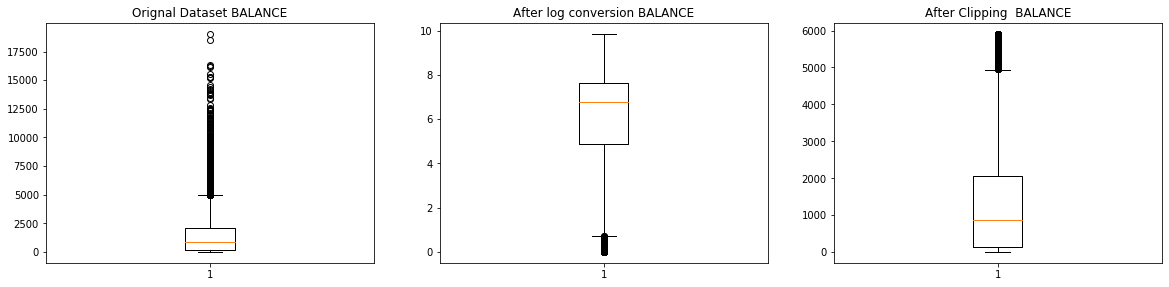

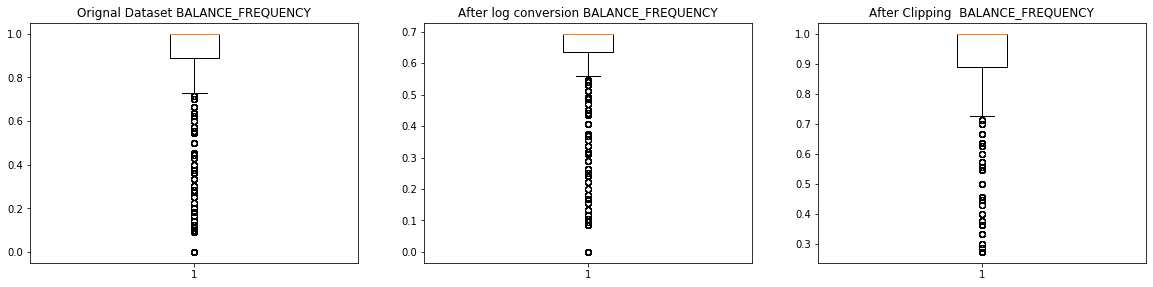

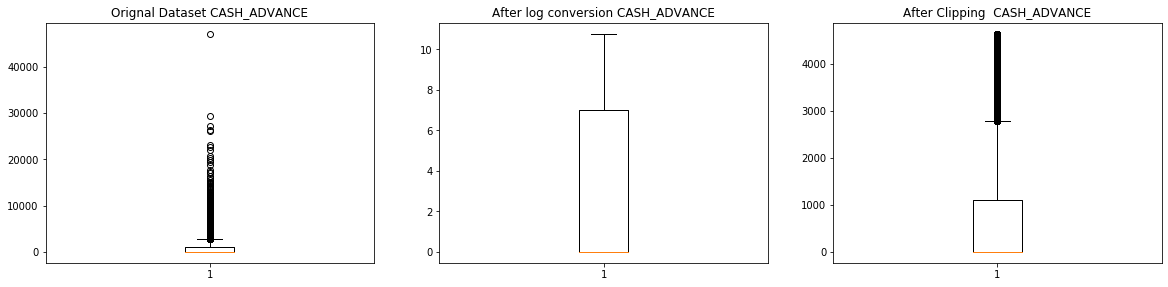

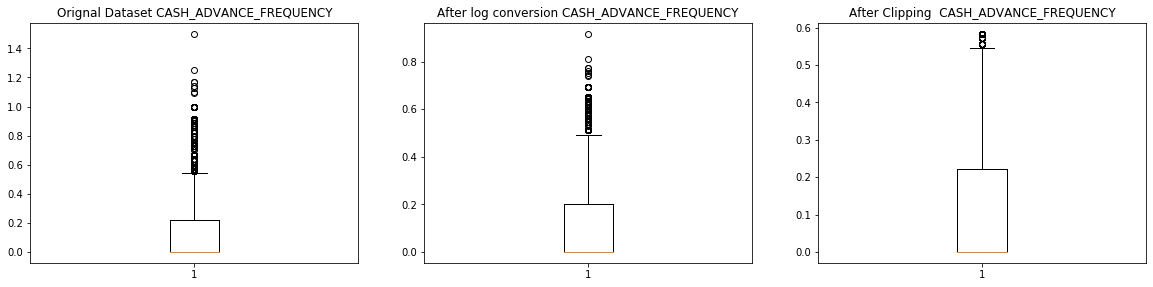

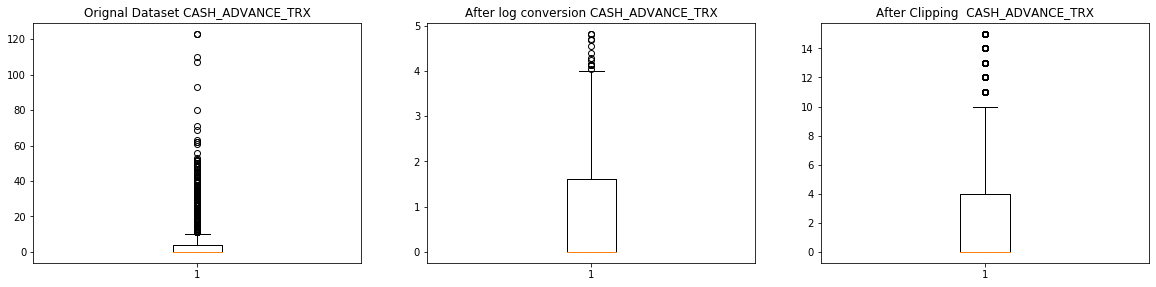

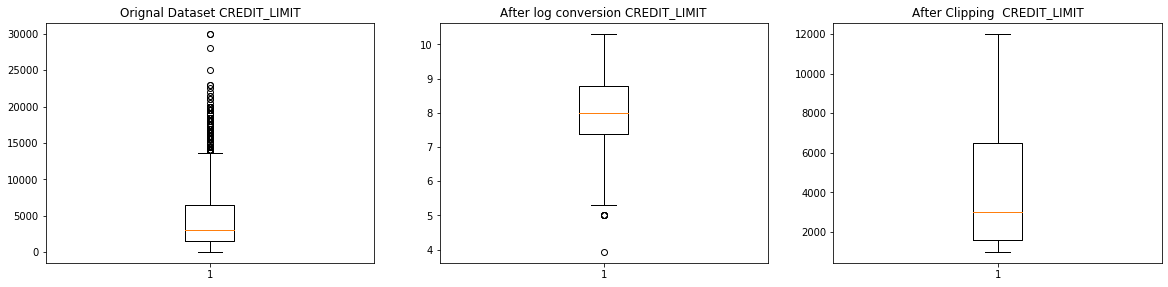

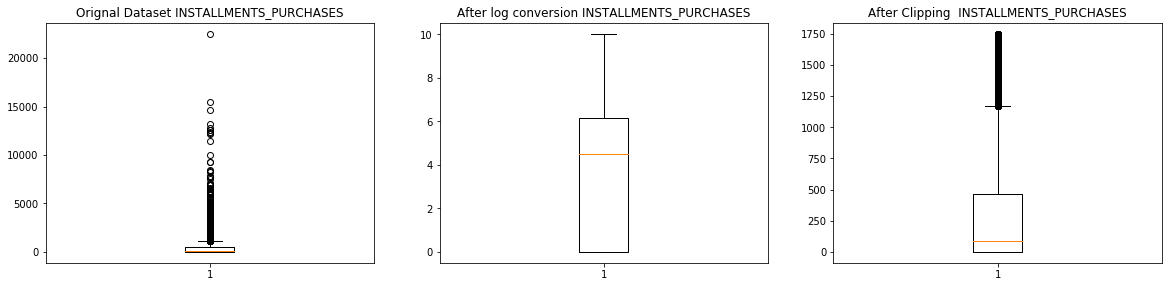

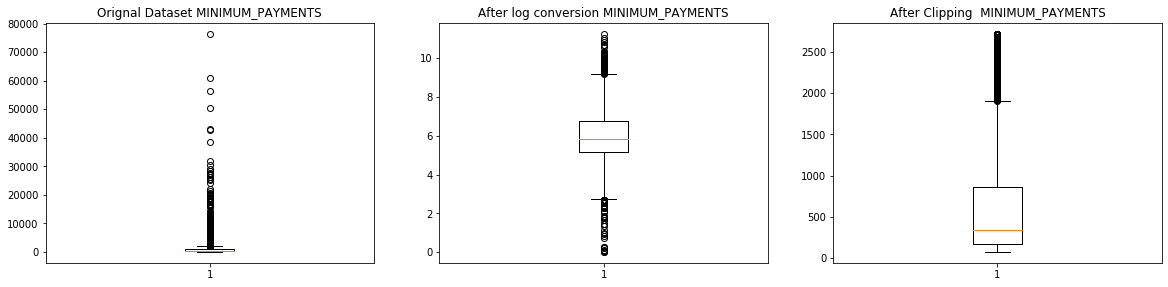

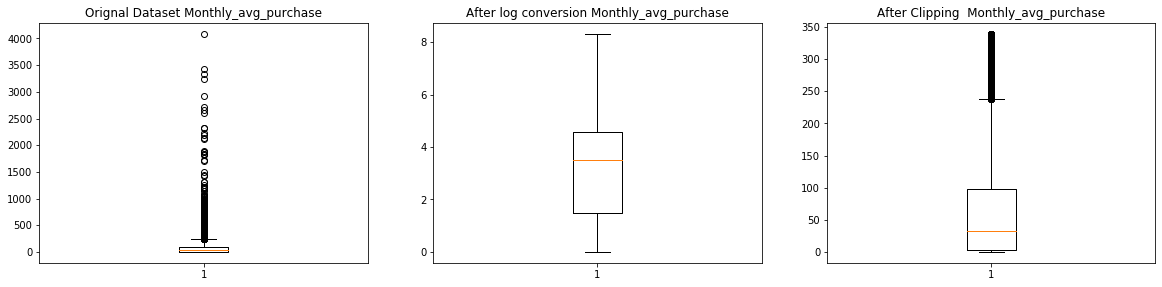

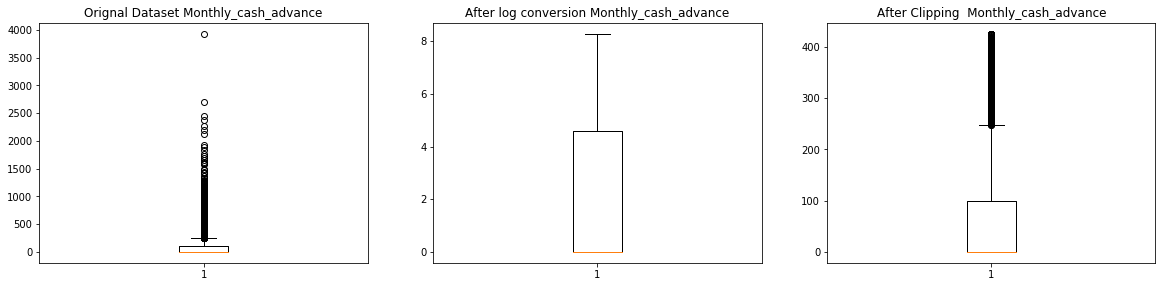

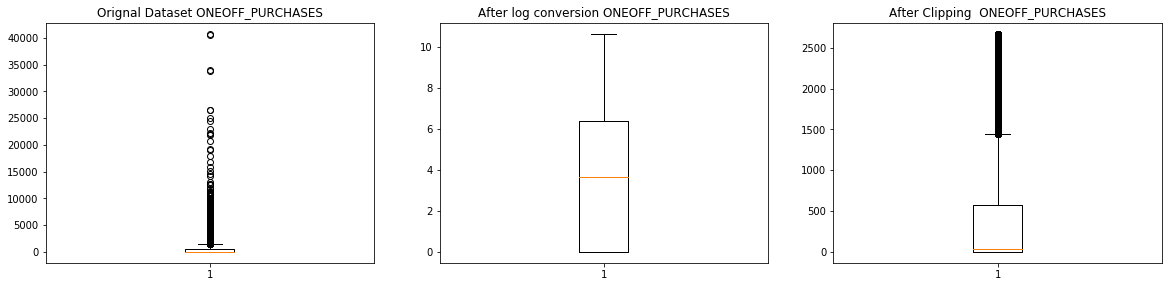

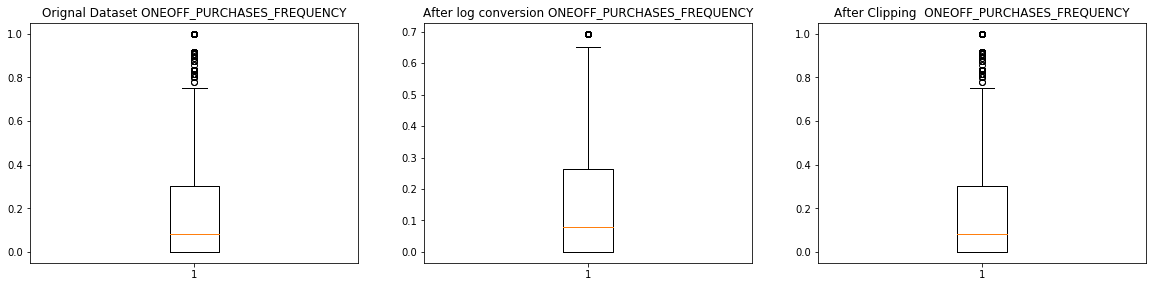

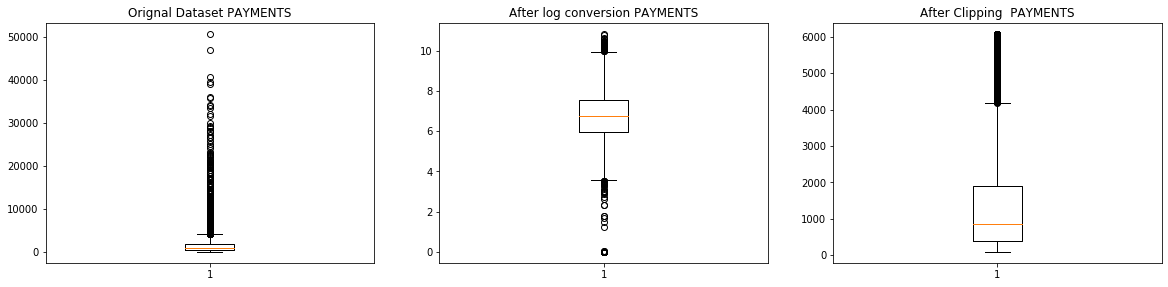

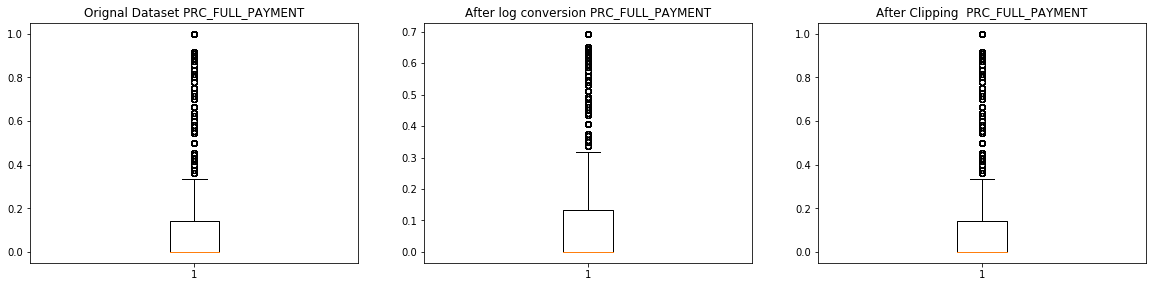

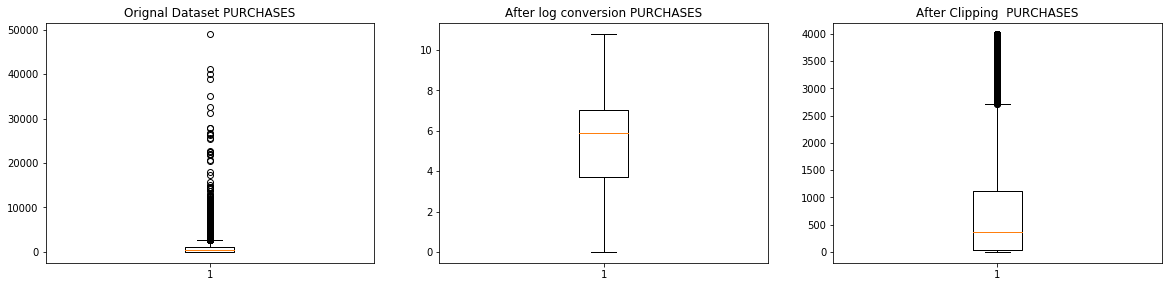

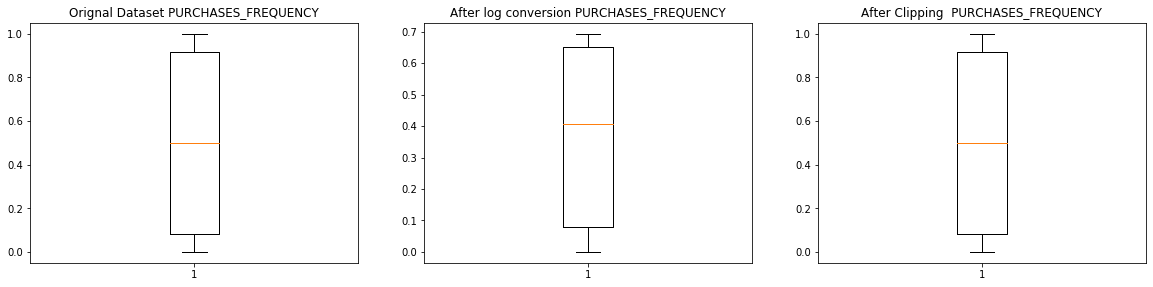

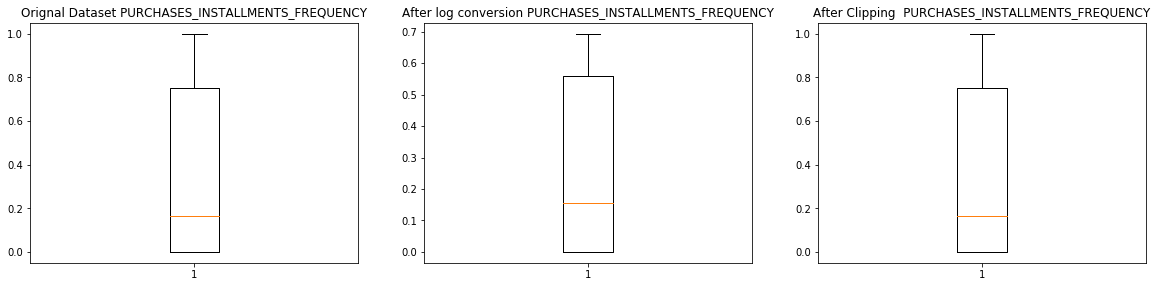

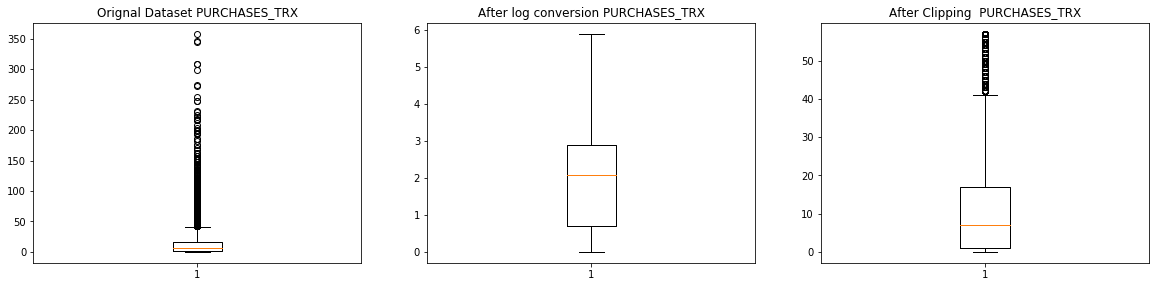

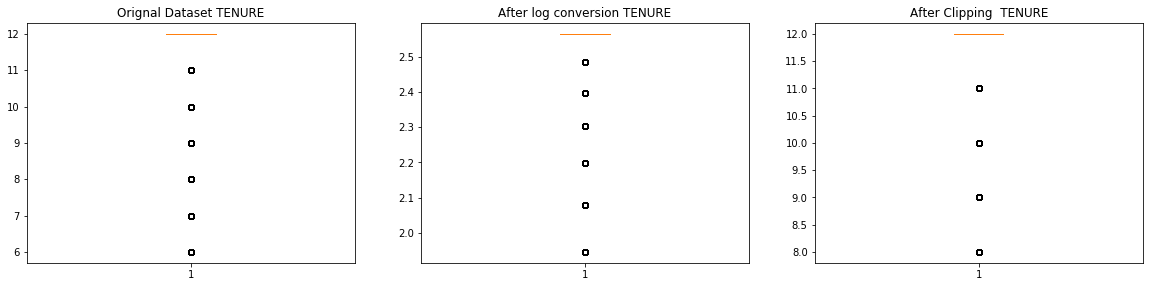

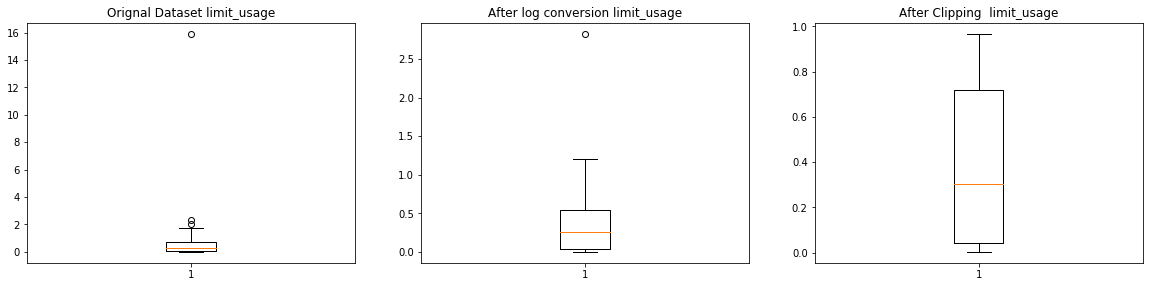

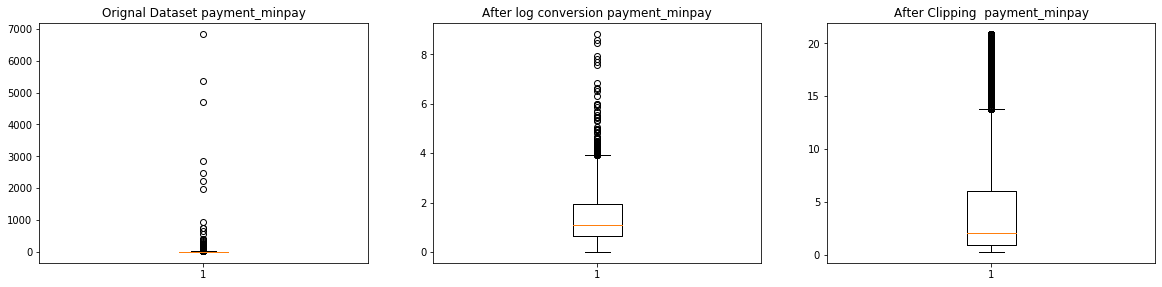

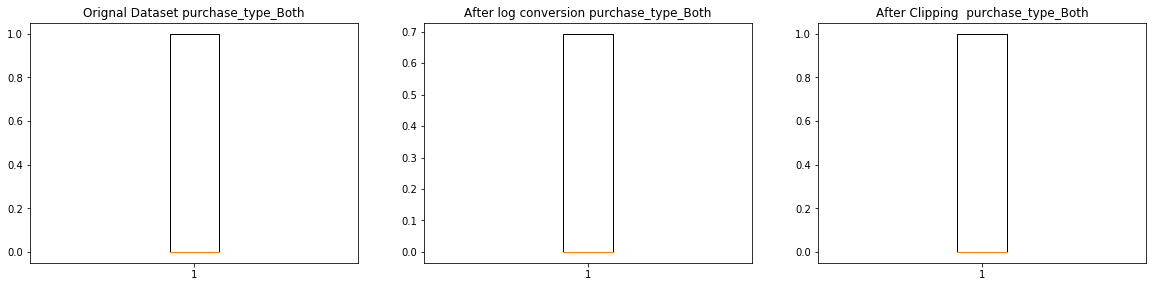

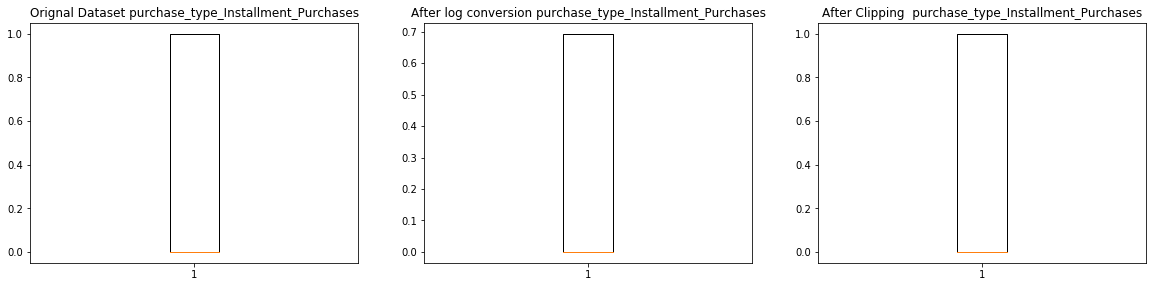

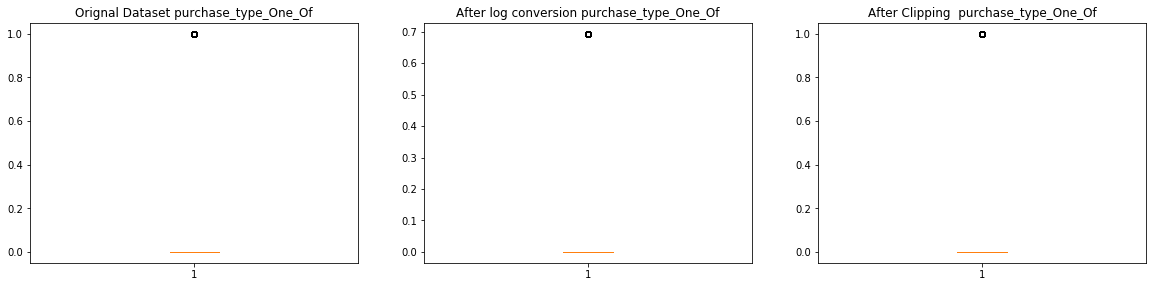

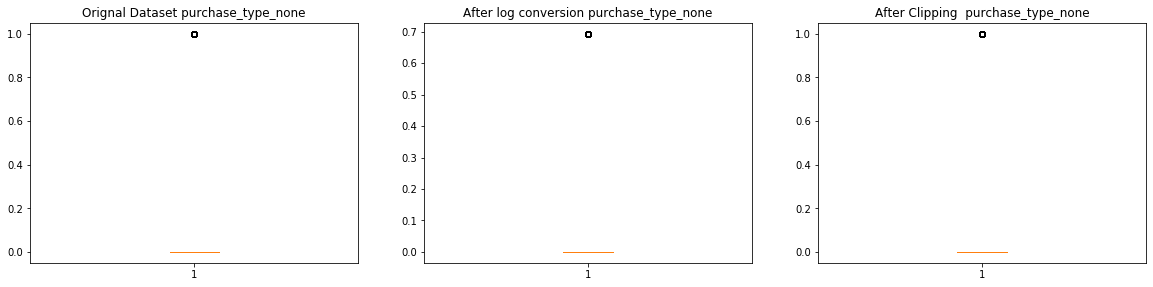

In [32]:
for i in df.columns.difference(['CUST_ID']):
    plt.figure(figsize=(20,15))
    plt.subplot(3,3,1)
    count = df[i].nunique()
    plt.boxplot(df[i])
    plt.title(str("Orignal Dataset") + str(" ") + str(i))
    plt.subplot(3,3,2)
    count = df_log[i].nunique()
    plt.boxplot(df_log[i])
    plt.title(str("After log conversion") + str(" ") + str(i))
    plt.subplot(3,3,3)
    count = df_clip[i].nunique()
    plt.boxplot(df_clip[i])
    plt.title(str("After Clipping ") + str(" ") + str(i))

    From the series of boxplot given above it is clear that the log conversion gives better result in fixing outliers without loosing data.
    Thus will continue forward with log conversion.

In [213]:
#Copying dataframe
df2 = df_log

### Scaling dataframe 

In [214]:
st = StandardScaler()
st.fit_transform(df2)

array([[-1.20521818, -0.14875746, -0.93073294, ...,  1.72051649,
        -0.514625  , -0.54369045],
       [ 0.94891762,  0.17961568,  1.52878819, ..., -0.58122082,
        -0.514625  ,  1.83928189],
       [ 0.82499258,  0.49271003, -0.93073294, ..., -0.58122082,
         1.94316249, -0.54369045],
       ...,
       [-1.4738341 , -0.09290575, -0.93073294, ...,  1.72051649,
        -0.514625  , -0.54369045],
       [-1.73377525, -0.09290575,  0.08603831, ..., -0.58122082,
        -0.514625  ,  1.83928189],
       [-0.11830096, -0.73437135,  0.42995349, ..., -0.58122082,
         1.94316249, -0.54369045]])

  Feature reduction not done as the size of data set is small and is not computational expensive

### K-Means 

#### Finding optimal cluster count

##### Cluster Error and Silhouette

In [254]:
# Calculating cluster error and silhouette score for number of clusters from range 2-21 
cluster_range = range( 2, 10 )
cluster_errors = []
scores = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,random_state=123,n_jobs=-1)
    clusters.fit(df2)
    cluster_errors.append(clusters.inertia_)
    scores.append(metrics.silhouette_score(df2, clusters.labels_))

In [216]:
cluster_errors

[346219.7951830666,
 246042.038757437,
 189345.87185709714,
 156136.3842751325,
 136332.2353943959,
 122844.86997448053,
 114880.23848603493,
 106567.73272653583]

In [217]:
scores

[0.3754803193065282,
 0.39729130141906593,
 0.39185687489021803,
 0.4164846266909265,
 0.41753394502453994,
 0.4336093346857298,
 0.38913908461803315,
 0.32727785028082546]

Text(0.5, 1.0, 'Silhouette score')

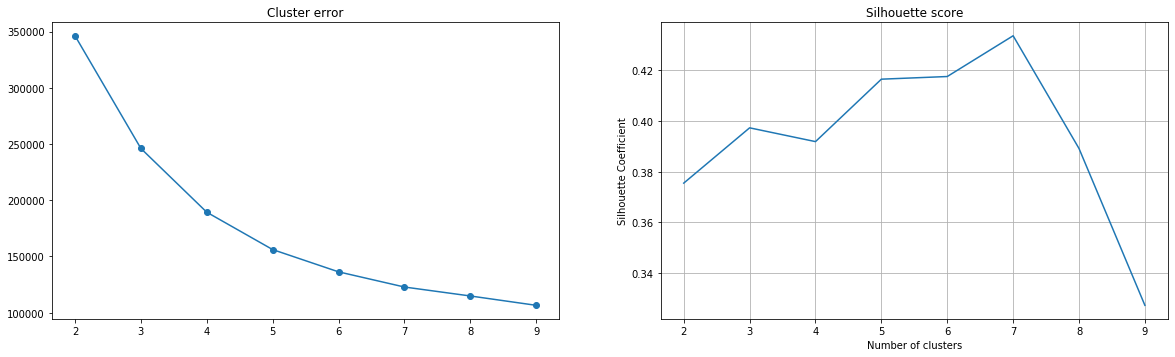

In [218]:
# Plotting cluster error
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.title(str('Cluster error'))

#Plotting Silhouette score
plt.subplot(2,2,2)
plt.plot(cluster_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.title(str('Silhouette score'))

    From above given data, it is clear that value for parameter n_cluster should be 7

#### K-Means cluster

In [237]:
km = KMeans(n_clusters=7,random_state=123,n_jobs=-1)
km.fit(df2)
pred = km.predict(df2)
pred

array([1, 2, 0, ..., 1, 2, 5])

In [238]:
#Concatenating predicted cluster numbers and orginal dataframe with dervided variables.
df_3 = pd.concat([df,pd.Series(pred,name='Cluster_7')],axis=1)

In [239]:
df_3.sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,purchase_type_none,purchase_type_One_Of,purchase_type_Installment_Purchases,purchase_type_Both,Cluster_7
8321,C18542,7.258112,0.272727,57.00,57.00,0.00,0.0,0.090909,0.090909,0.000000,...,11,5.181818,0.0,0.004839,3.706963,0,1,0,0,0
7383,C17584,158.512412,0.454545,713.64,713.64,0.00,0.0,0.083333,0.083333,0.000000,...,12,59.470000,0.0,0.052837,11.662741,0,1,0,0,0
976,C11010,887.679317,1.000000,1486.31,179.75,1306.56,0.0,1.000000,0.833333,0.916667,...,12,123.859167,0.0,0.493155,0.000000,0,0,0,1,4
4004,C14117,99.029726,1.000000,1496.87,429.27,1067.60,0.0,0.916667,0.333333,0.833333,...,12,124.739167,0.0,0.019806,10.673150,0,0,0,1,4
2646,C12723,3441.516174,1.000000,358.68,0.00,358.68,0.0,1.000000,0.000000,0.916667,...,12,29.890000,0.0,0.458869,1.830630,0,0,1,0,1


In [240]:
#Mean of all the variables with respect to there cluster
clus = df_3[df_3.columns.difference(['CUST_ID'])].groupby('Cluster_7').apply(lambda x: x.mean())
clus.drop(columns='Cluster_7',inplace=True)
clus.T

Cluster_7,0,1,2,3,4,5,6
BALANCE,761.125777,378.987218,2146.008578,2915.897615,1284.249284,2410.035168,2617.616359
BALANCE_FREQUENCY,0.774609,0.785236,0.882580,0.970610,0.945748,0.929952,0.960029
CASH_ADVANCE,1.205971,0.303536,1989.561555,2179.173805,0.529229,2099.106246,2034.992793
CASH_ADVANCE_FREQUENCY,0.002620,0.000616,0.272005,0.298013,0.001058,0.303196,0.264708
CASH_ADVANCE_TRX,0.033246,0.006864,6.286952,7.977731,0.012696,7.105058,6.294872
CREDIT_LIMIT,4387.323365,3111.395662,4026.199163,5927.318251,5851.893481,4690.492866,4423.824786
INSTALLMENTS_PURCHASES,1.674829,499.489124,0.085696,804.877826,1042.488755,0.975032,527.570000
MINIMUM_PAYMENTS,523.014005,662.015921,994.964271,1275.142162,687.982610,1028.863951,1458.991881
Monthly_avg_purchase,74.964553,43.766979,0.016031,173.795674,223.638768,60.898889,46.825800
Monthly_cash_advance,0.103284,0.026895,182.720168,193.247785,0.044102,191.081377,185.993216


### Visualizing different attributes with respect to different clusters.

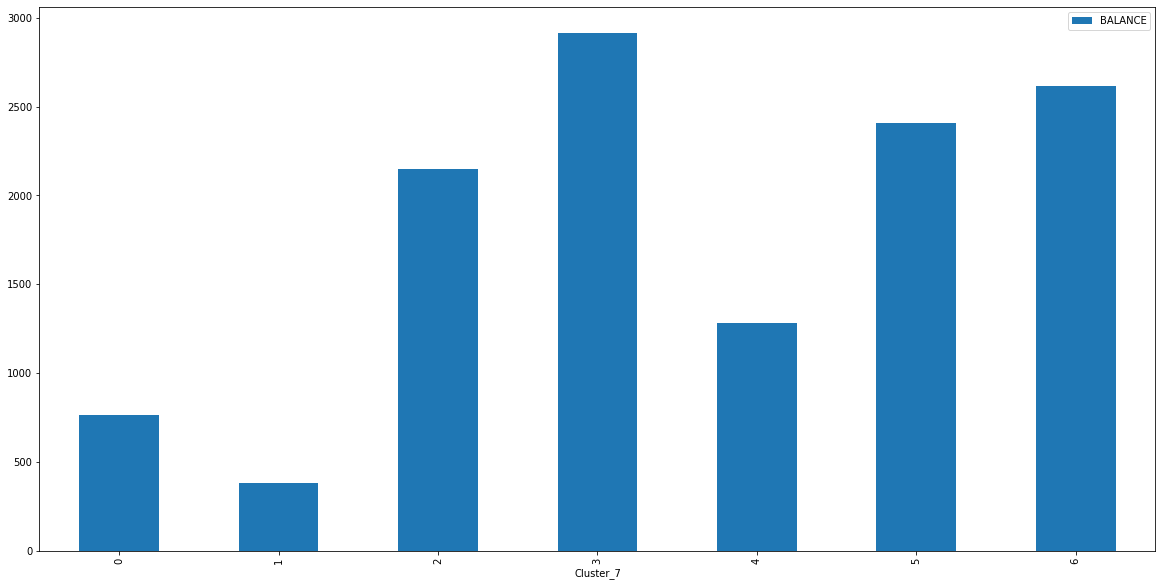

In [241]:
clus['BALANCE'].plot(kind='bar',figsize=(20,10),logy=False,legend=True)

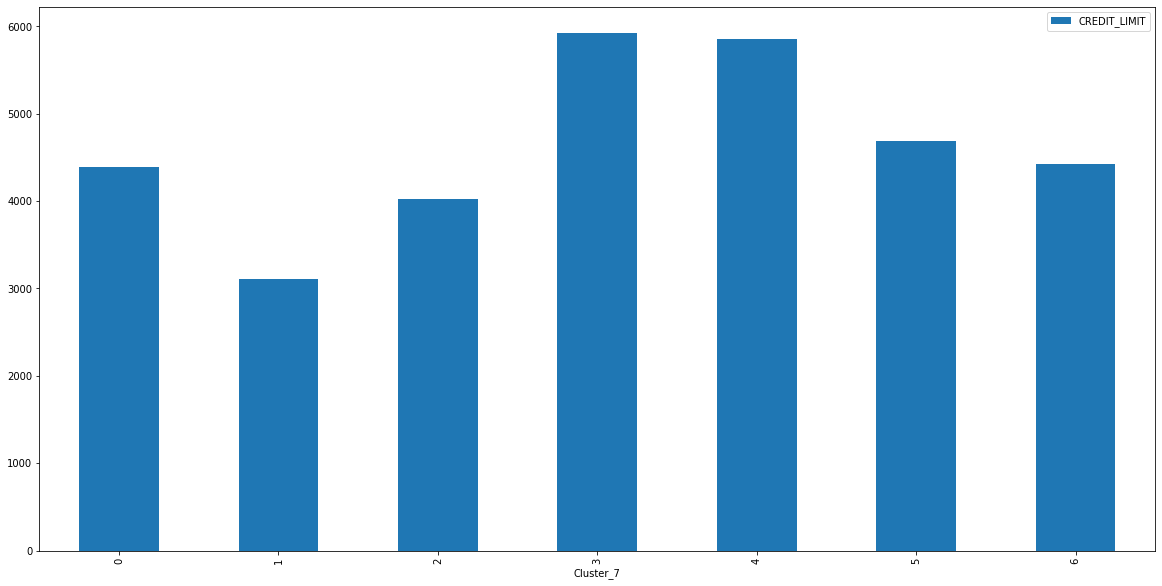

In [242]:
clus['CREDIT_LIMIT'].plot(kind='bar',figsize=(20,10),logy=False,legend=True)

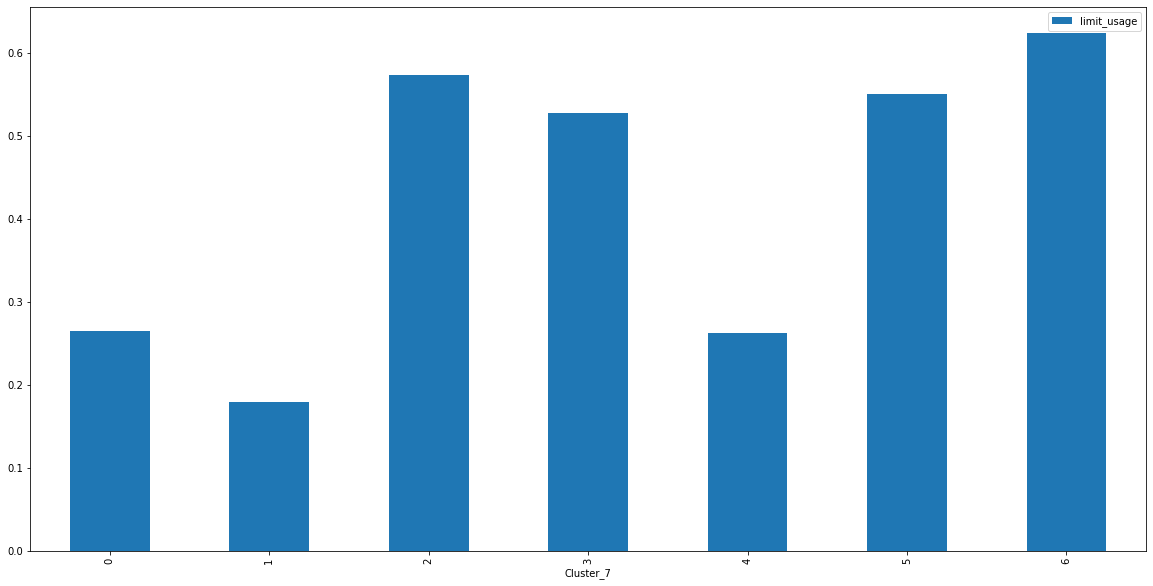

In [243]:
clus['limit_usage'].plot(kind='bar',figsize=(20,10),logy=False,legend=True)

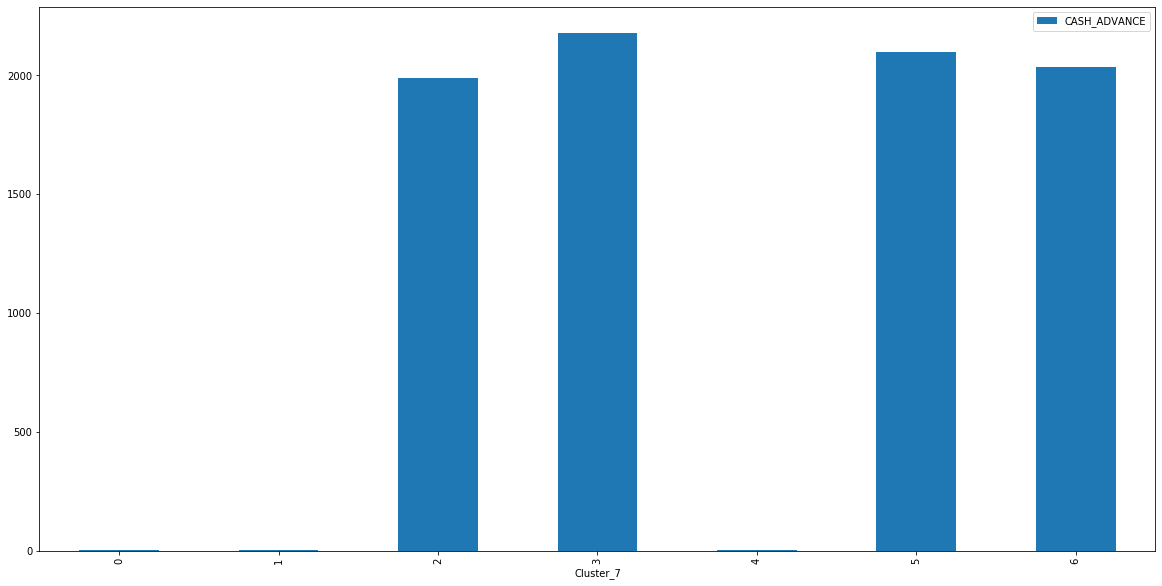

In [244]:
clus['CASH_ADVANCE'].plot(kind='bar',figsize=(20,10),logy=False,legend=True)

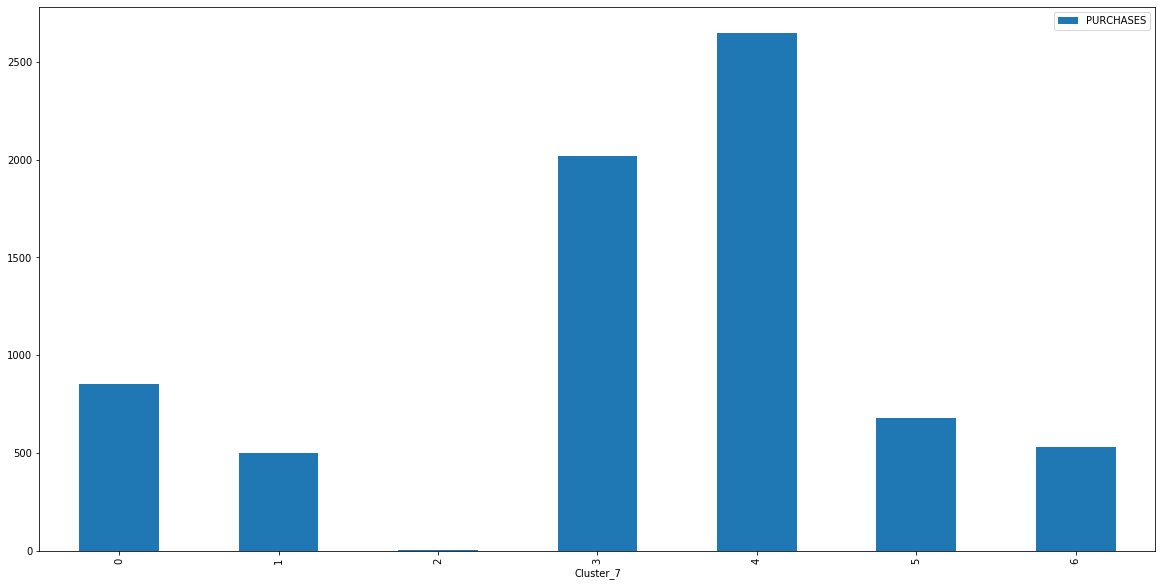

In [245]:
clus['PURCHASES'].plot(kind='bar',figsize=(20,10),logy=False,legend=True)

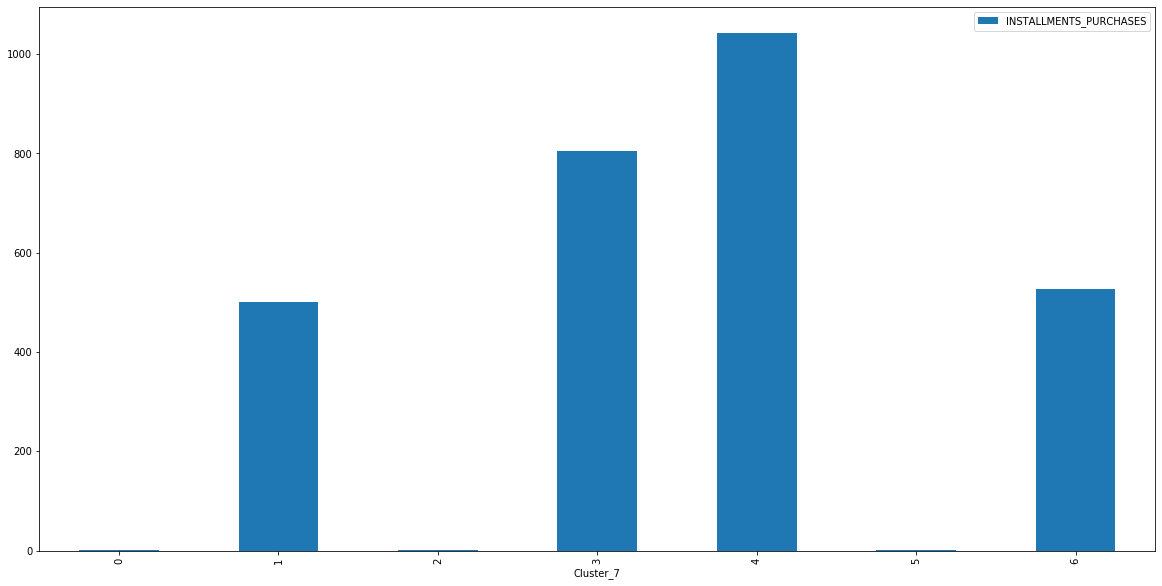

In [246]:
clus['INSTALLMENTS_PURCHASES'].plot(kind='bar',figsize=(20,10),logy=False,legend=True)

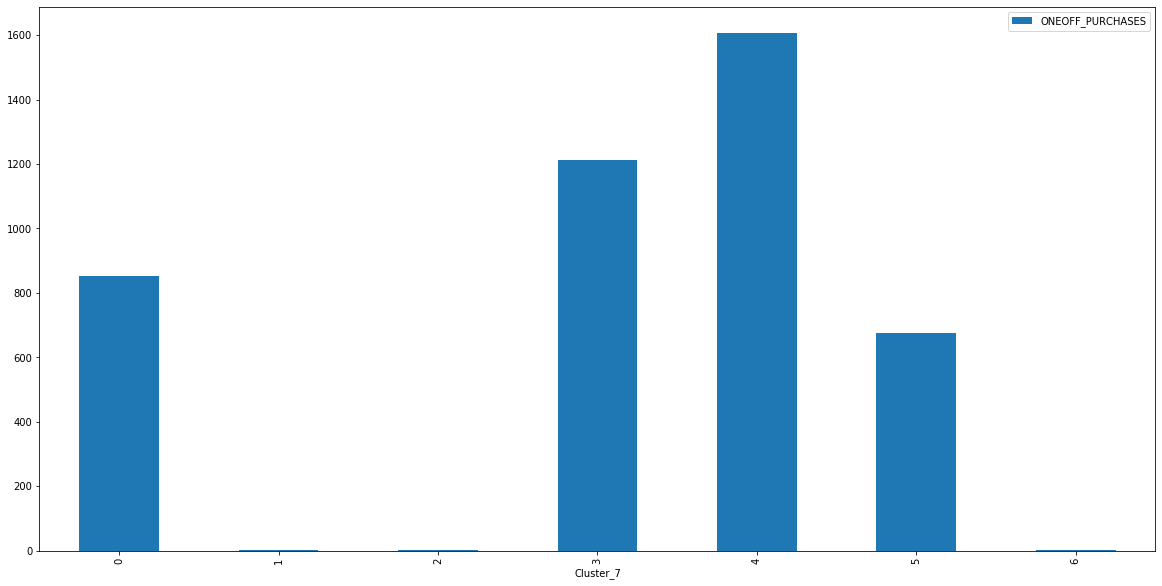

In [247]:
clus['ONEOFF_PURCHASES'].plot(kind='bar',figsize=(20,10),logy=False,legend=True)

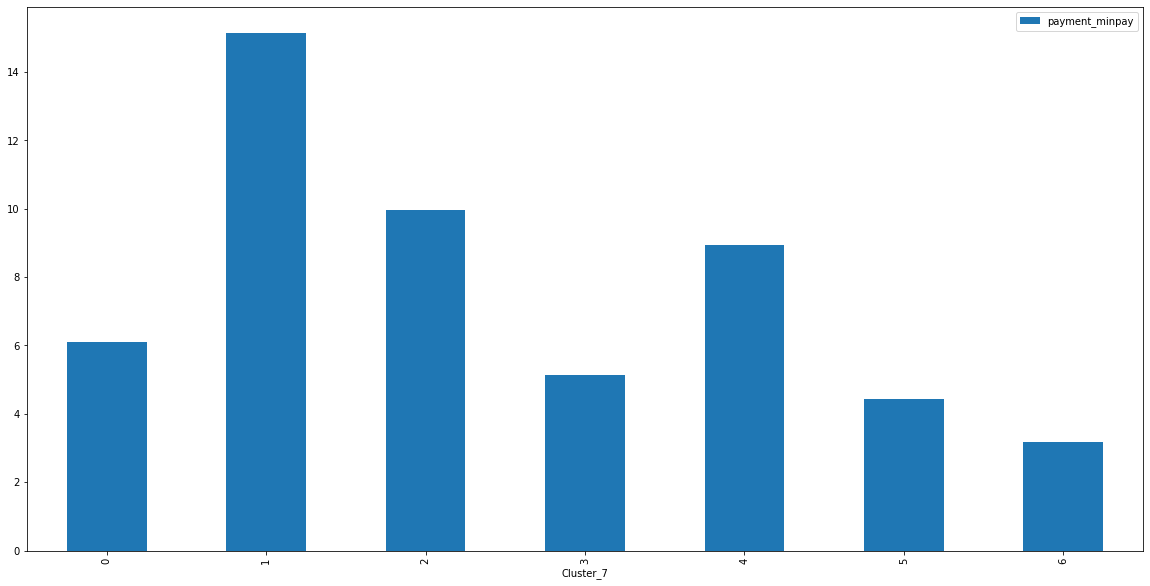

In [248]:
clus['payment_minpay'].plot(kind='bar',figsize=(20,10),logy=False,legend=True)

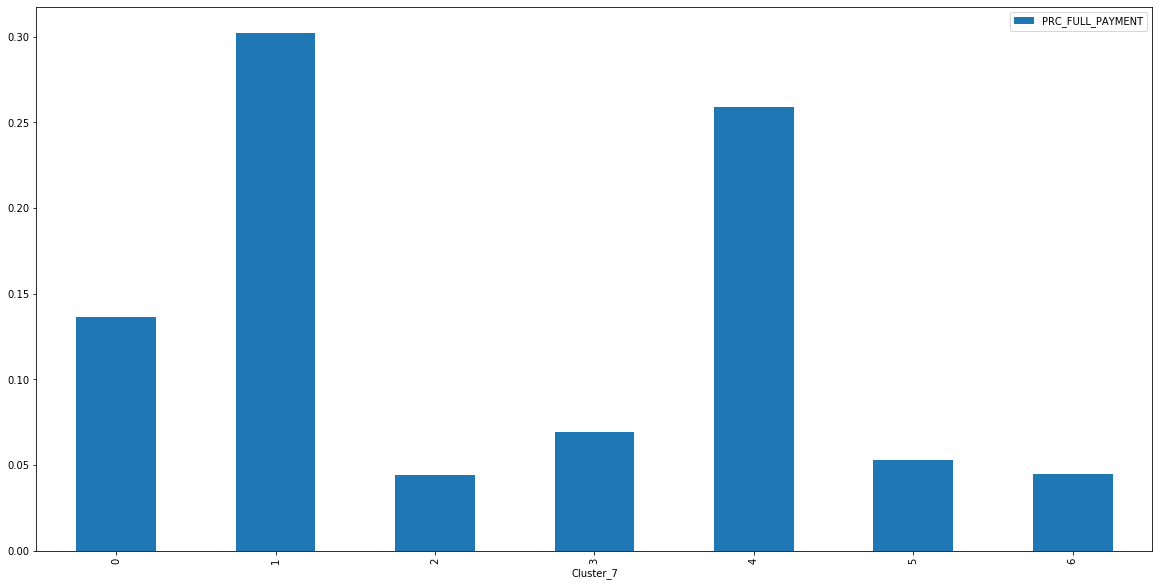

In [249]:
clus['PRC_FULL_PAYMENT'].plot(kind='bar',figsize=(20,10),logy=False,legend=True)

In [250]:
clus.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'CASH_ADVANCE',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'CREDIT_LIMIT',
       'INSTALLMENTS_PURCHASES', 'MINIMUM_PAYMENTS', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'ONEOFF_PURCHASES',
       'ONEOFF_PURCHASES_FREQUENCY', 'PAYMENTS', 'PRC_FULL_PAYMENT',
       'PURCHASES', 'PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'PURCHASES_TRX', 'TENURE', 'limit_usage', 'payment_minpay',
       'purchase_type_Both', 'purchase_type_Installment_Purchases',
       'purchase_type_One_Of', 'purchase_type_none'],
      dtype='object')

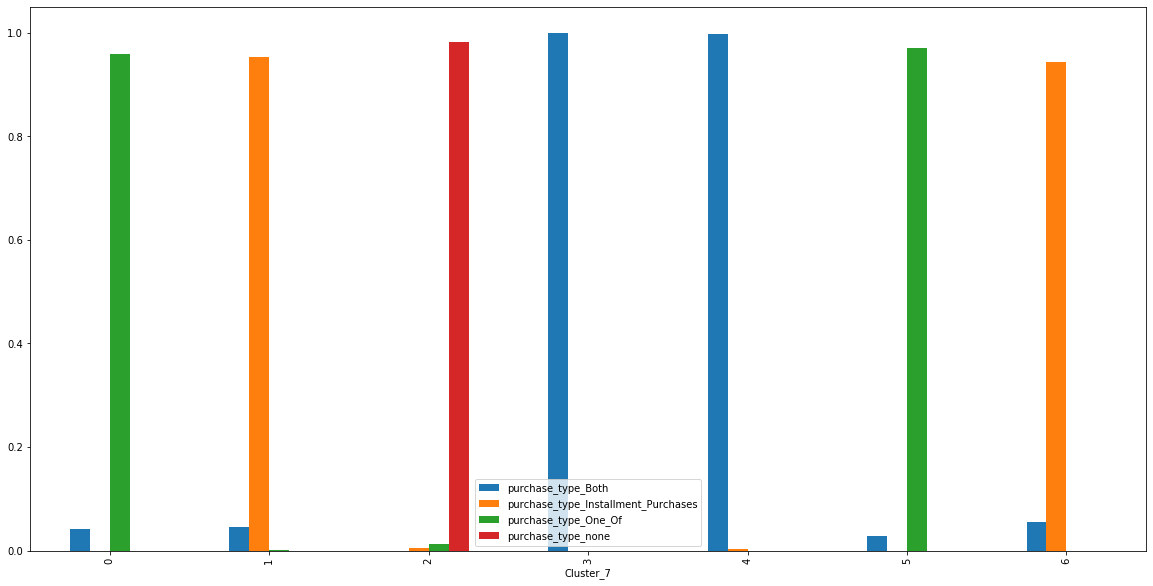

In [253]:
clus[['purchase_type_Both','purchase_type_Installment_Purchases','purchase_type_One_Of','purchase_type_none']].plot(kind='bar',figsize=(20,10),logy=False,legend=True)

### Interpretation

    Group 1
    Key points:- 
    limit usage around 27%.
    No cash advance
    Decent one off purchase
    payment to minimum payment ratio is not normal. Not too high or low. (6)
    Percentage of months with full payment due is around 14%.
    
    Marketing Strategy:-
    Customers in this segment should be given a better interest rate to boost installment purchase. This would also lead to rise in payment to minimum payment ratio.
    One of purchse could be the reason for low payment to minimum payment ratio. If customer opts for installment purchase it would lower the pressure on customers balance.
    

    Group 2
    Key points:- 
    Limit usage is around 19%
    No cash advance
    Decent installment purchase.
    Payment to minimum payment ratio is the highest (14+).
    Percentage of months with full payment due is highest around 30%.
    
    Marketing Strategy:-
    Customers in this segment have the best credit history. There credit limit is currently low it can be increased significantly.

    
    Group 3
    Key points:- 
    limit usage is around 60%
    Take high cash advance.
    No purchases
    Payment to minimum payment ratio is around 10.
    Percentage of months with full payment due is the lowest less than 5%.
    
    Marketing Strategy:-
    Customers in this segemnt only use card for cash advance, it's better to offer a better personal loan as charges on credit card cash advance are pretty high. 

    
    Group 4
    Key points:- 
    limit usage is around 55%
    Take highest cash advance.
    Tend to do high instalment and oneoff purchase
    Payment to minimum payment ratio is low(around 5).
    Percentage of months with full payment due is around 6%.
    
    Marketing Strategy:-
    Customers in this segment are extremly risky and should be closley monitored.

    
    Group 5
    Key points:- 
    limit usage is around 27%
    No cash advance
    Highest one off purchases and installment purchases.
    Payment to minimum payment ratio is around 9.
    Percentage of months with full payment due is around 25%.
    
    Marketing Strategy:-
    Customers in this segment tend to purchase more. Credit card with higher limit and more reward points and other benefit should be offered.

    
    Group 6
    Key points:- 
    limit usage is around 55%
    Take high cash advance
    Small one off purchase
    Payment to minimum payment ratio is around 5
    Percentage of months with full payment due is around 5%.
    
    Marketing Strategy:-
    Customers in this segment tend to take high cash advance and try to display some transactions by making small one off purchases.
    Limit for these customers should not be increased and a credit card with better interest rates should be targeted to disencourage them from makeing one off purchases.
    Also, these customers should be monitored frequently.
   
    Group 7
    Key points:- 
    Limit usage is highest, around 65%
    Take high cash advance
    Decent installment purchases
    Payment to minimum paytment ratio is around 3
    Percentage of months with full payment due is around 4%.
    
    Marketing Strategy:-
    Customers in this segment tend to take high cash advance and try to display some transactions by making small installment purchases.
    As these customers have bad credit history even after making purchases on installments, credit limit should not be increased for quite a while and personal loan should be targeted to discourage cash advance on     credit card.